In [1]:
import time
import matplotlib.pyplot as plt

# Environments
from environments.ACOEnvironment import ACOEnvironment
from environments.Environment import Environment

# Algorithms
from algorithms.AntColonyOptimization import AntColonyOptimization
from algorithms.ParticleSwarmOptimization import ParticleSwarmOptimization

# Helper classes
from helpers.PathSpecification import PathSpecification
from helpers.Coordinate import Coordinate

# Ant Colony Optimization

First, we initialize the variables we will be using for the example.

In [2]:
# Please keep your parameters for the environment easily changeable here
width = 40
height = 40
start_pos = Coordinate(0, 16)
end_pos = Coordinate(39, 39)
step_size = 1
amount_of_obstacles = 0.4
radius_obstacles = 2

In [3]:
# Please keep your parameters for the Genetic Algorithm easily changeable here
population_size = 100
generations = 1000
mutation_prob = 0.005
crossover_prob = 0.7
persist_file = "./../data/optimal_tsp"

In [4]:
# Please keep your parameters for the ACO easily changeable here
agents_per_generation = 30
no_generations = 50
q = 500
evaporation = 0.5
trail = 1.0
convergence_iter = 3500
no_change_iter = 30
sigma_elite = 50

Next, we build the environment and other necessary objects. We also print how the environment looks like

Finished preparing the environment


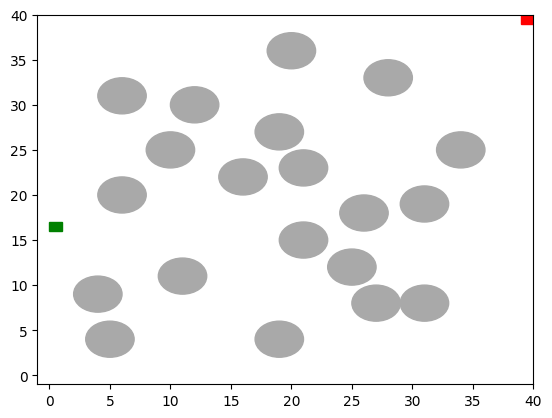

In [5]:
# Construct the optimization objects
environment = ACOEnvironment.create_environment(width, height, radius_obstacles, amount_of_obstacles, start_pos=start_pos, end_pos=end_pos)
spec = PathSpecification(start_pos, end_pos)
aco = AntColonyOptimization(environment, agents_per_generation, no_generations, q, evaporation, convergence_iter, no_change_iter, trail, sigma_elite, step_size, num_processes=6)

# Show the environment in matplotlib
environment.visualize_environment()

Next, we run the ACO algorithm and print the results.

Started ACO
Generation 0
Routes found so far: 30
Best route's length: 292


Generation 1
Routes found so far: 30
Best route's length: 292


Generation 2
Routes found so far: 30
Best route's length: 292


Generation 3
Routes found so far: 30
Best route's length: 181


Generation 4
Routes found so far: 30
Best route's length: 181


Generation 5
Routes found so far: 30
Best route's length: 181


Generation 6
Routes found so far: 30
Best route's length: 181


Generation 7
Routes found so far: 30
Best route's length: 181


Generation 8
Routes found so far: 30
Best route's length: 181


Generation 9
Routes found so far: 30
Best route's length: 181


Generation 10
Routes found so far: 30
Best route's length: 181


Generation 11
Routes found so far: 30
Best route's length: 181


Generation 12
Routes found so far: 30
Best route's length: 181


Generation 13
Routes found so far: 30
Best route's length: 174


Generation 14
Routes found so far: 30
Best route's length: 174


Generation 15
Routes fo

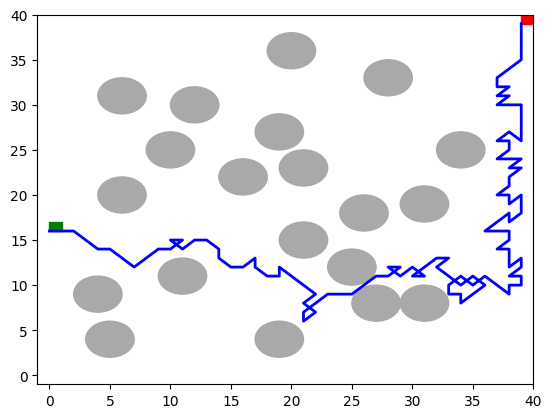

In [6]:
# Save starting time
start_time = int(round(time.time() * 1000))

print("Started ACO")

# Run optimization
shortest_route, checkpoints = aco.find_shortest_route(spec, print_progress=True)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

# Print route path
environment.visualize_environment(shortest_route)

# Particle Swarm Optimization

Finished preparing the environment


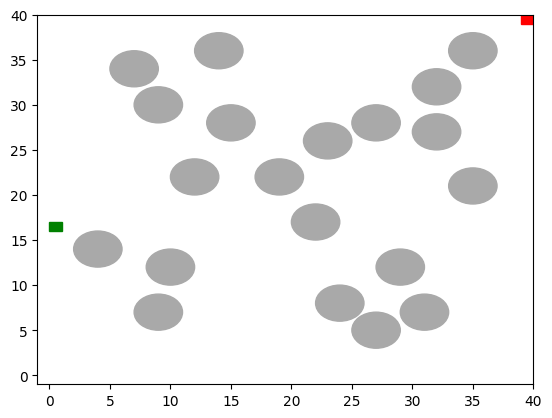

In [15]:
# use the environment variables already declared above and add the definitions for pso
# eventually consider using the same environment for aco as for pso?
pso_environment = Environment.create_environment(width, height, radius_obstacles, amount_of_obstacles, start_pos=start_pos, end_pos=end_pos)
pso_spec = PathSpecification(start_pos, end_pos)
num_iterations = 2500 # for the purpose of letting levy flights get out of local optima eventually
inertia_weight = 1.0 # currently irrelevant as adapted from acceleration coefficients, but given for completeness
num_particles = 500 # the number of particles generated initially to run pso on

# initialize pso
pso = ParticleSwarmOptimization(pso_environment, pso_spec, num_particles, convergence_iter, trail, step_size, inertia_weight, num_iterations)

# Show the environment in matplotlib
pso_environment.visualize_environment()

Started PSO
0.777026876169699, 16.732364848191327
1.3987261446640122, 17.318330024371487
2.2556991818411705, 18.894351345721002
3.8889097620628603, 20.0
5.46975278687409, 21.600802666374218
7.136942757497334, 23.291988680939614
8.833886319241195, 24.921266767170074
10.547422854622555, 26.454797944662523
12.222261663958532, 28.09483084410664
13.85503777756305, 29.79143306036198
15.548218803746845, 31.43731453129401
17.252308123464395, 32.85228054895437
18.957373593042288, 34.27565092025003
20.616712793042574, 35.67246123598821
22.294827778089378, 37.2144590131217
23.969941669044427, 38.319553927922406
25.22233439781765, 38.98574648814713
25.519913150896354, 38.589590965604934
25.85789297893153, 38.91605668625246
25.85789297893153, 38.91605668625246
25.85789297893153, 38.91605668625246
25.85789297893153, 38.91605668625246
25.85789297893153, 38.91605668625246
25.85789297893153, 38.91605668625246
25.85789297893153, 38.91605668625246
25.85789297893153, 38.91605668625246
25.85789297893153, 3

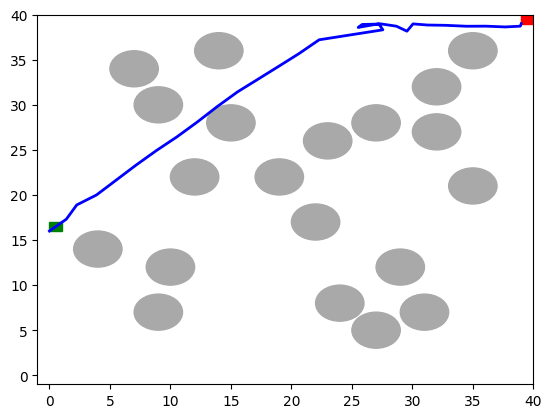

In [16]:
# Save starting time
start_time = int(round(time.time() * 1000))

print("Started PSO")

# run the pso
shortest_route = pso.run()

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size; not really relevant for pso as it adds global bests and may get stuck for a bit
# normally measured in path length or time taken better
print("Route size: " + str(shortest_route.size()))

# Print route path
pso_environment.visualize_environment(shortest_route)

#### Parameter tuning

Now, we will start tuning several hyperparameters for our ACO Algorithm. Specifically, we will be tuning the q value.

In [ ]:
agents_per_generation = 15
no_generations = 20
evaporation = 0.1
trail = 1.0
convergence_iter = 100
no_change_iter = 20
sigma_elite = 5

environment = ACOEnvironment.create_environment(width, height, start_pos, end_pos, radius_obstacles, amount_of_obstacles)
spec = PathSpecification.read_coordinates(start_pos, end_pos)
distances = []
q_list = [1, 10, 100, 500, 1000]

for q in q_list:
    shortest_route = 0
    aco = AntColonyOptimization(environment, agents_per_generation, no_generations, q, evaporation, convergence_iter, no_change_iter, trail, sigma_elite, num_processes=6)
    for i in range(10):
        route, checkpoints = aco.find_shortest_route(spec)
        shortest_route += route.size()
    distances.append(shortest_route / 10)

plt.plot(q_list, distances)
plt.xlabel("Q values")
plt.ylabel("Route size")
plt.title("Q value versus route size")
plt.show()

#### Speed of convergence (generations) of the grading environments

In [ ]:
agents_per_generation = 20
no_generations = 50
q = 200
evaporation = 0.2
trail = 1.0
convergence_iter = 10000
no_change_iter = 50
sigma_elite = 50

environment = ACOEnvironment.create_environment(width, height, start_pos, end_pos, radius_obstacles, amount_of_obstacles)
spec = PathSpecification.read_coordinates(start_pos, end_pos)
aco = AntColonyOptimization(environment, agents_per_generation, no_generations, q, evaporation, convergence_iter, no_change_iter, trail, sigma_elite, num_processes=6)
shortest_route, checkpoints = aco.find_shortest_route(spec)



plt.plot([1, 3, 5, 7, 10, 20, 30, 40, 50], checkpoints)
plt.xlabel("Generations")
plt.ylabel("Route size")
plt.title("Speed of convergence for medium environment")
plt.show()